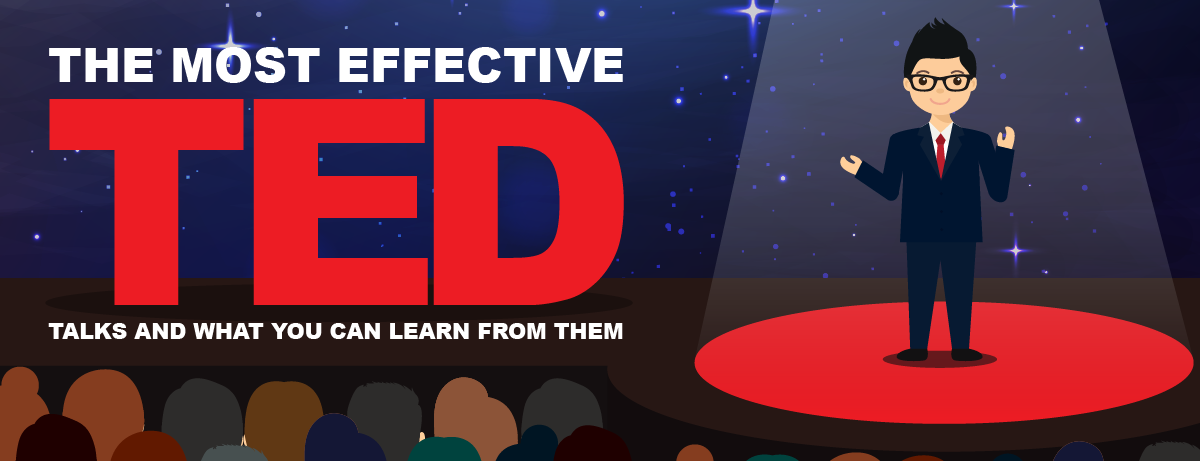

# Projeto 2 - Análise de Dados com Python com Publicações da **TED Talks**
TED é uma série de conferências realizadas na Europa, na Ásia e nas Américas pela fundação Sapling, dos Estados Unidos, sem fins lucrativos, destinadas à disseminação de ideias – segundo as palavras da própria organização, "ideias que merecem ser disseminadas".

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('./data/ted_main.csv')
df.tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309
2549,8,With more than half of the world population li...,519,TED2017,1492992000,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,1506092422,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721


In [4]:
print(df.columns)
df.shape

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')


(2550, 17)

In [5]:
# Reordenar as colunas
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]
df.head(3)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,1140825600,1151367060,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,1140825600,1151367060,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,1140739200,1151367060,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292


In [6]:
# Corrigir as Datas
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
df['film_date'].head(3)

0    25-02-2006
1    25-02-2006
2    24-02-2006
Name: film_date, dtype: object

In [7]:
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
df['published_date'].head(3)

0    27-06-2006
1    27-06-2006
2    27-06-2006
Name: published_date, dtype: object

In [18]:
df.tail(3)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,month
2547,Radhika Nagpal: What intelligent machines can ...,What intelligent machines can learn from a sch...,Science fiction visions of the future show us ...,Radhika Nagpal,Robotics engineer,1,651,TED2017,24-04-2017,21-09-2017,10,"['AI', 'ants', 'fish', 'future', 'innovation',...",1,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/radhika_nagpal_what_...,375647,Abr
2548,Theo E.J. Wilson: A black man goes undercover ...,A black man goes undercover in the alt-right,In an unmissable talk about race and politics ...,Theo E.J. Wilson,Public intellectual,1,1100,TEDxMileHigh,08-07-2017,21-09-2017,32,"['Internet', 'TEDx', 'United States', 'communi...",1,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309,Jul
2549,Karoliina Korppoo: How a video game might help...,How a video game might help us build better ci...,With more than half of the world population li...,Karoliina Korppoo,Game designer,1,519,TED2017,24-04-2017,22-09-2017,8,"['cities', 'design', 'future', 'infrastructure...",1,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/karoliina_korppoo_ho...,391721,Abr


In [20]:
# Top 5 mais visualizados
top5_talks = df.sort_values('views', ascending=False)[['title', 'main_speaker', 'views', 'published_date']]
top5_talks.head(10)

,title,main_speaker,views,published_date
0,Do schools kill creativity?,Ken Robinson,47227110,27-06-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,01-10-2012
677,How great leaders inspire action,Simon Sinek,34309432,04-05-2010
837,The power of vulnerability,Brené Brown,31168150,23-12-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,20-05-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,27-06-2014
201,My stroke of insight,Jill Bolte Taylor,21190883,12-03-2008
5,Why we do what we do,Tony Robbins,20685401,27-06-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,08-01-2016
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,16-01-2013


In [13]:
df.describe()

,num_speaker,duration,comments,languages,views
count,2550.000000,2550.000000,2550.000000,2550.000000,2.550000e+03
mean,1.028235,826.510196,191.562353,27.326275,1.698297e+06
std,0.207705,374.009138,282.315223,9.563452,2.498479e+06
min,1.000000,135.000000,2.000000,0.000000,5.044300e+04
25%,1.000000,577.000000,63.000000,23.000000,7.557928e+05
50%,1.000000,848.000000,118.000000,28.000000,1.124524e+06
75%,1.000000,1046.750000,221.750000,33.000000,1.700760e+06
max,5.000000,5256.000000,6404.000000,72.000000,4.722711e+07


In [14]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

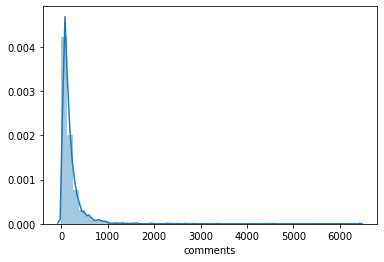

In [15]:
sns.distplot(df['comments'])

In [16]:
# Separar por mês
month_order = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
df['month'] = df['film_date'].apply(lambda x: month_order[int(x.split('-')[1])-1])
df['month'].head(10)

0    Fev
1    Fev
2    Fev
3    Fev
4    Fev
5    Fev
6    Fev
7    Fev
8    Fev
9    Fev
Name: month, dtype: object

In [17]:
month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']
month_df.head(3)

,month,talks
0,Fev,601
1,Mar,397
2,Jun,270


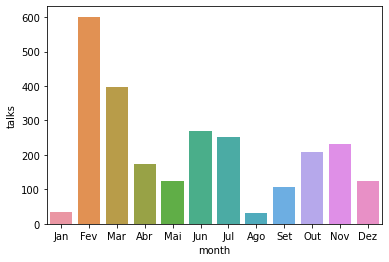

In [19]:
sns.barplot(x='month', y='talks', data=month_df, order=month_order)

In [24]:
df['film_date']

0       25-02-2006
1       25-02-2006
2       24-02-2006
3       26-02-2006
4       22-02-2006
           ...    
2545    06-06-2017
2546    24-04-2017
2547    24-04-2017
2548    08-07-2017
2549    24-04-2017
Name: film_date, Length: 2550, dtype: object

In [21]:
# Separar por Ano
df['year'] = df['film_date'].apply(lambda x:x.split('-')[2])
df['year'].head(3)

0    2006
1    2006
2    2006
Name: year, dtype: object

In [22]:
year_df = pd.DataFrame(df['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']
year_df.head(3)

,year,talks
0,2013,270
1,2011,270
2,2010,267


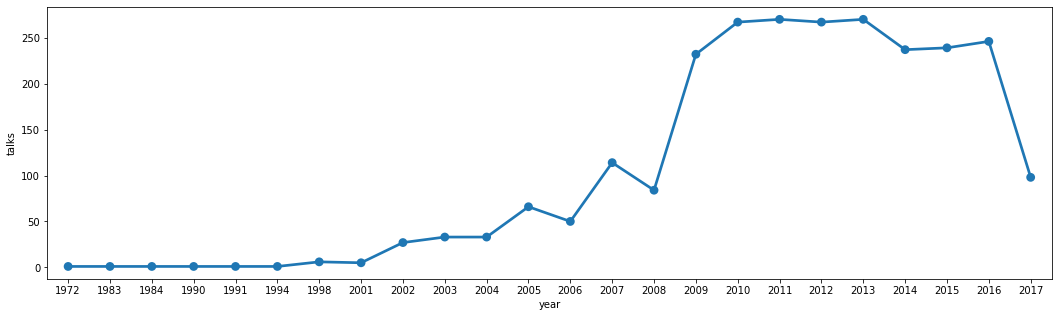

In [23]:
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_df)

# Top 8 dos Modelos de Machine Learning

<span style="display:block;text-align:center">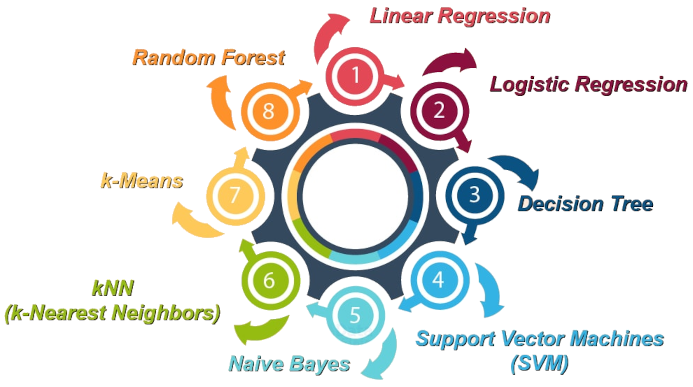</span>

## 1. Regressão Linear
Em estatística, regressão é uma técnica que permite explorar e inferir a relação de uma variável dependente com variáveis independentes específicas.

In [25]:
# Importar as Bibliotecas
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

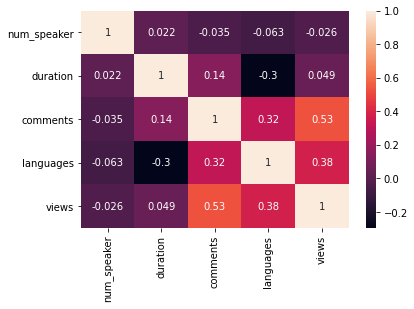

In [26]:
# Correlacionamento entre as variáveis
rel = df.corr()
sns.heatmap(rel, xticklabels=rel.columns, yticklabels=rel.columns, annot=True)
plt.show()

In [27]:
# Separar as colunas que interessam
df2 = df[['comments', 'views']]
df2.head()

,comments,views
0,4553,47227110
1,265,3200520
2,124,1636292
3,200,1697550
4,593,12005869


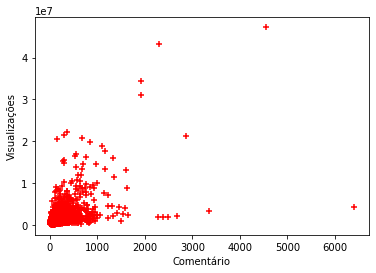

In [28]:
# Plotar um gráfico
plt.xlabel('Comentário')
plt.ylabel('Visualizações')
plt.scatter(df2.comments, df2.views, color='red', marker='+')

In [33]:
# Separar em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(df2[['comments']], df2['views'], test_size = .3)

In [34]:
# Treinar o modelo
regLin = linear_model.LinearRegression()
regLin.fit(X_train, y_train)

LinearRegression()

In [35]:
# Realizar as Predições
y_pred = regLin.predict(X_test)
regLin.coef_

array([4722.78543228])

In [36]:
# Verificar a Performance
r2_score(y_test, y_pred)

0.20605605420717177

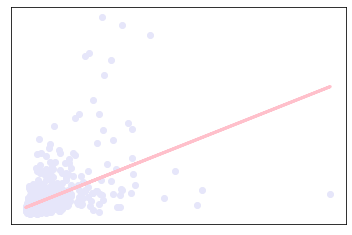

In [37]:
# Plotar o Resultado
plt.scatter(X_test, y_test,color = 'lavender')
plt.plot(X_test, y_pred,color = 'pink', linewidth = 3)
plt.xticks(())
plt.yticks(())
plt.show()

## 2. Regressão Logística

In [38]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from scipy.optimize import curve_fit

In [39]:
# A visualização seja maior que a média atual
desejo = pd.Series(np.where(df['views'] >= 1698297, 1, 0))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df2[['comments']], desejo, test_size = .3)

In [41]:
regLog = LogisticRegression()
regLog.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Realizar as Predições
y_pred = regLog.predict(X_test)
regLog.coef_

array([[0.00521611]])

In [43]:
# Verificar a Performance
r2_score(y_test, y_pred)

0.0024608808188558706

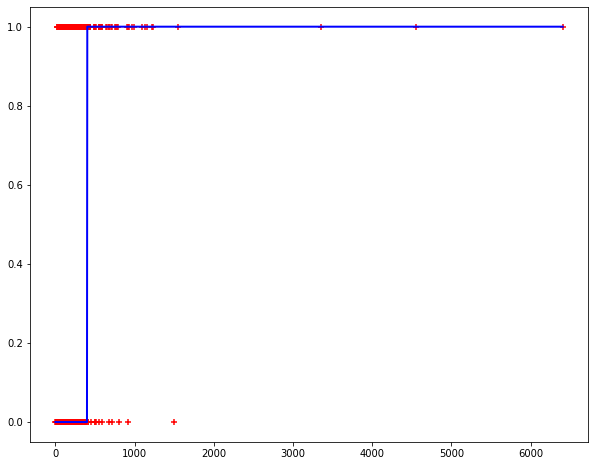

In [44]:
plt.rcParams['figure.figsize'] = (10,8)

dfG = pd.DataFrame({'Comentario': X_test['comments'], 'Correto': y_test, 'Predito': y_pred})
dfG = dfG.sort_values(by=['Comentario'])

plt.scatter(dfG['Comentario'], dfG['Correto'], color='red', marker='+')
plt.plot(dfG['Comentario'], dfG['Predito'], color='blue', linewidth=2)
plt.show()

Obrigado e até a próxima \
Fernando Anselmo